# 4. PANDAS Fundamentals

- Create DF
    - Create Dummy DF
    - Copy DF to another variable
    - add / drop columns
    - Re-order / Re-name columns
    - add / drop rows
    - delete df
- Visualize df
    - Header and Tail
    - Columns
    - info
    - describe
    - Correlation
    - unique values
    - Sort data / Specific order of elements in columns
    - Slice Columns
    - Show data based on conditions
    - Group By
- Modify Data
    - Replace
    - Map
    - get dummies
    - Missing Data
    - astype
    - interpolate
    - lambda expression with datetime
- Plotting with Pandas

In [2]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

In [3]:
print(dir(pd),end=' ')

['BooleanDtype', 'Categorical', 'CategoricalDtype', 'CategoricalIndex', 'DataFrame', 'DateOffset', 'DatetimeIndex', 'DatetimeTZDtype', 'ExcelFile', 'ExcelWriter', 'Float64Index', 'Grouper', 'HDFStore', 'Index', 'IndexSlice', 'Int16Dtype', 'Int32Dtype', 'Int64Dtype', 'Int64Index', 'Int8Dtype', 'Interval', 'IntervalDtype', 'IntervalIndex', 'MultiIndex', 'NA', 'NaT', 'NamedAgg', 'Period', 'PeriodDtype', 'PeriodIndex', 'RangeIndex', 'Series', 'SparseDtype', 'StringDtype', 'Timedelta', 'TimedeltaIndex', 'Timestamp', 'UInt16Dtype', 'UInt32Dtype', 'UInt64Dtype', 'UInt64Index', 'UInt8Dtype', '__builtins__', '__cached__', '__doc__', '__docformat__', '__file__', '__getattr__', '__git_version__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', '_config', '_hashtable', '_is_numpy_dev', '_lib', '_libs', '_np_version_under1p16', '_np_version_under1p17', '_np_version_under1p18', '_testing', '_tslib', '_typing', '_version', 'api', 'array', 'arrays', 'bdate_range', 'comp

### Create DF

 ----- Create Rows, Colums and Dataframe -----

In [4]:
# Creating rows

Expenses = []
Year = []
Month = []
Exp_cat = []
Month_library = ['January','February','March','April','May','June','July',
                 'August','September','October','November','December']
Exp_cat_library = ['Fixed Expenses','Personal Expense','Work Expense','Emergencies']
for number in range(20):
    Expenses.append(random.randint(10,500))
    Year.append(random.randint(2018,2020))
    Month.append(Month_library[random.randint(0,11)])
    Exp_cat.append(Exp_cat_library[random.randint(0,3)])

# Creating column names and assigning data 
data = {'Month':Month,'Year':Year,'Exp_cat':Exp_cat,'Expenses':Expenses}


# Create dataframe
df = pd.DataFrame(data=data)


----- Copy DF to another variable -----

In [5]:
#Copy df with slice notation
df2 = df[:] 

----- Add / Drop columns -----

In [6]:
# DROP column
df2.drop('Month',axis=1,inplace=True)  

# Warning will show up indicating the the value modified is from a sliced (copied) df

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [7]:
print(df.columns,'\n\n',df2.columns)

Index(['Month', 'Year', 'Exp_cat', 'Expenses'], dtype='object') 

 Index(['Year', 'Exp_cat', 'Expenses'], dtype='object')


In [8]:
#ADD column
df2['Month'] = data['Month'] 

----- Re-order and Re-name Columns ------

In [9]:
#Re-order and Re-name columns
df2 = df[['Month','Year','Exp_cat','Expenses']] #re-order

#Rename option 1
df2.columns = df2.columns.str.replace('Month','SeveralMonths')
#Rename option 2
df2.rename(columns={'SeveralMonths':'Month'},inplace=True)
df2.columns

Index(['Month', 'Year', 'Exp_cat', 'Expenses'], dtype='object')

----- Add / drop rows  -----

In [10]:
#Add rows using loc ---IMPORTANT: Avoid growing dataframes. Instead, grow lists and then turn them into dataframes.

df2.loc[df.index.max() + 1] = ['February',2020,'Emergencies',500]
df2.tail(2)

,Month,Year,Exp_cat,Expenses
19,November,2018,Work Expense,280
20,February,2020,Emergencies,500


In [11]:
df2.drop(df2.index.max(),axis=0,inplace=True)

----- Delete DF -----

In [12]:
df2 = 'deleted df'
df2

'deleted df'

### Visualize Data Frame

----- Head and tail -----

In [13]:
#head and tail
print('Header:\n',df.head(3),'\n\n\n','Tail:\n',df.tail(2))

Header:
       Month  Year           Exp_cat  Expenses
0  December  2018       Emergencies       362
1  December  2019  Personal Expense       456
2      June  2019    Fixed Expenses        38 


 Tail:
        Month  Year         Exp_cat  Expenses
18     April  2020  Fixed Expenses       263
19  November  2018    Work Expense       280


In [14]:
df.columns

Index(['Month', 'Year', 'Exp_cat', 'Expenses'], dtype='object')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Month     20 non-null     object
 1   Year      20 non-null     int64 
 2   Exp_cat   20 non-null     object
 3   Expenses  20 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 768.0+ bytes


In [16]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year,20.0,2018.95,0.759155,2018.0,2018.00,2019.0,2019.25,2020.0
Expenses,20.0,261.60,144.770744,23.0,166.25,281.5,362.25,473.0


In [17]:
df.corr().transpose()

,Year,Expenses
Year,1.000000,0.111869
Expenses,0.111869,1.000000


----- unique values -----

In [18]:
df['Exp_cat'].unique(), df['Exp_cat'].nunique()

(array(['Emergencies', 'Personal Expense', 'Fixed Expenses',
        'Work Expense'], dtype=object),
 4)

----- Sort Data / Sort by specific order -----

In [19]:
df['Month'] = pd.Categorical(df['Month'], ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
                                           'September', 'October','November', 'December'])

df.sort_values(by=['Year','Month'])

,Month,Year,Exp_cat,Expenses
8,March,2018,Personal Expense,283
15,March,2018,Fixed Expenses,451
10,November,2018,Work Expense,23
19,November,2018,Work Expense,280
0,December,2018,Emergencies,362
7,December,2018,Fixed Expenses,30
16,February,2019,Personal Expense,140
6,March,2019,Fixed Expenses,89
14,March,2019,Work Expense,179
5,May,2019,Fixed Expenses,363


----- Show specific columns -----

In [20]:
#Slice DF show the columns specified only
df[['Month','Expenses']].head(2)

,Month,Expenses
0,December,362
1,December,456


----- Show data based on conditions -----

In [21]:
df[(df['Month']=='January')&(df['Expenses']>50)]

,Month,Year,Exp_cat,Expenses


In [22]:
df[(df['Month'].isin('January February March'.split()))].sort_values(by='Month')

,Month,Year,Exp_cat,Expenses
16,February,2019,Personal Expense,140
6,March,2019,Fixed Expenses,89
8,March,2018,Personal Expense,283
14,March,2019,Work Expense,179
15,March,2018,Fixed Expenses,451


----- Group by -----

In [23]:
df.groupby(['Year','Month']).sum().dropna()

Expenses
Year Month              
2018 March         734.0
     November      303.0
     December      392.0
2019 February      140.0
     March         268.0
     May           363.0
     June          353.0
     July          473.0
     September     349.0
     December      456.0
2020 April         263.0
     June          303.0
     September     175.0
     December      660.0

### Modify Data

----- Replace -----

In [24]:
df = df.replace({'Fixed Expenses':'Fixed Expense'})
df['Month'].unique()

['December', 'June', 'May', 'March', 'July', 'November', 'September', 'February', 'April']
Categories (9, object): ['December', 'June', 'May', 'March', ..., 'November', 'September', 'February', 'April']

----- Map -----

In [25]:
df['Exp_Categories'] = df['Exp_cat'].map({'Personal Expense':1,'Fixed Expense':2,'Work Expense':np.nan,'Emergencies':4})


----- Get dummies -----

In [26]:
df[['D1','D2','D3']] = pd.get_dummies(df['Exp_cat'],drop_first=True,)
df

,Month,Year,Exp_cat,Expenses,Exp_Categories,D1,D2,D3
0,December,2018,Emergencies,362,4.0,0,0,0
1,December,2019,Personal Expense,456,1.0,0,1,0
2,June,2019,Fixed Expense,38,2.0,1,0,0
3,June,2020,Personal Expense,303,1.0,0,1,0
4,December,2020,Personal Expense,424,1.0,0,1,0
5,May,2019,Fixed Expense,363,2.0,1,0,0
6,March,2019,Fixed Expense,89,2.0,1,0,0
7,December,2018,Fixed Expense,30,2.0,1,0,0
8,March,2018,Personal Expense,283,1.0,0,1,0
9,July,2019,Personal Expense,473,1.0,0,1,0


----- Missing Data -----

In [27]:
df.isnull().sum()

Month             0
Year              0
Exp_cat           0
Expenses          0
Exp_Categories    4
D1                0
D2                0
D3                0
dtype: int64

In [28]:
df['Exp_Categories'].dropna().unique()

array([4., 1., 2.])

In [29]:
df['Exp_Categories'] = df['Exp_Categories'].fillna(value=3)


----- astype -----

In [30]:
type(df['Expenses'][0])

numpy.int64

In [31]:
df['Expenses'] = df['Expenses'].astype('float64')
type(df['Expenses'][0])

numpy.float64

----- Interpolate -----

In [32]:
# Set last 10 rows as null so interpolation could be explained
print(df.loc[9]['Expenses'])
print(df.loc[17]['Expenses'])
df.loc[10:16,'Expenses'] = np.nan
df


473.0
175.0


,Month,Year,Exp_cat,Expenses,Exp_Categories,D1,D2,D3
0,December,2018,Emergencies,362.0,4.0,0,0,0
1,December,2019,Personal Expense,456.0,1.0,0,1,0
2,June,2019,Fixed Expense,38.0,2.0,1,0,0
3,June,2020,Personal Expense,303.0,1.0,0,1,0
4,December,2020,Personal Expense,424.0,1.0,0,1,0
5,May,2019,Fixed Expense,363.0,2.0,1,0,0
6,March,2019,Fixed Expense,89.0,2.0,1,0,0
7,December,2018,Fixed Expense,30.0,2.0,1,0,0
8,March,2018,Personal Expense,283.0,1.0,0,1,0
9,July,2019,Personal Expense,473.0,1.0,0,1,0


In [33]:
df['Expenses'] = df['Expenses'].interpolate()
df[9:18][:]

,Month,Year,Exp_cat,Expenses,Exp_Categories,D1,D2,D3
9,July,2019,Personal Expense,473.00,1.0,0,1,0
10,November,2018,Work Expense,435.75,3.0,0,0,1
11,June,2019,Personal Expense,398.50,1.0,0,1,0
12,September,2019,Fixed Expense,361.25,2.0,1,0,0
13,December,2020,Work Expense,324.00,3.0,0,0,1
14,March,2019,Work Expense,286.75,3.0,0,0,1
15,March,2018,Fixed Expense,249.50,2.0,1,0,0
16,February,2019,Personal Expense,212.25,1.0,0,1,0
17,September,2020,Personal Expense,175.00,1.0,0,1,0


**----- Lambda Expression with datetime -----**

In [34]:
df['Month_number'] = df['Month'].apply(lambda x: datetime.datetime.strptime(x,'%B').month)
df.head(3)

,Month,Year,Exp_cat,Expenses,Exp_Categories,D1,D2,D3,Month_number
0,December,2018,Emergencies,362.0,4.0,0,0,0,12
1,December,2019,Personal Expense,456.0,1.0,0,1,0,12
2,June,2019,Fixed Expense,38.0,2.0,1,0,0,6


In [35]:
date_time_str = '2018-06-29 08:15:27'
date_time_obj = datetime.datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S')

print('Date:', date_time_obj.date())
print('Time:', date_time_obj.time())
print('Date-time:', date_time_obj)

Date: 2018-06-29
Time: 08:15:27
Date-time: 2018-06-29 08:15:27


### Time Formats

%a ---	Weekday, short version	Wed	
%A ---	Weekday, full version	Wednesday	
%w ---	Weekday as a number 0-6, 0 is Sunday	3	
%d ---	Day of month 01-31	31	
%b ---	Month name, short version	Dec	
%B ---	Month name, full version	December	
%m ---	Month as a number 01-12	12	
%y ---	Year, short version, without century	18	
%Y ---	Year, full version	2018	
%H ---	Hour 00-23	17	
%I ---	Hour 00-12	05	
%p ---	AM/PM	PM	
%M ---	Minute 00-59	41	
%S ---	Second 00-59	08	
%f ---	Microsecond 000000-999999	548513	
%z ---	UTC offset	+0100	
%Z ---	Timezone	CST	
%j ---	Day number of year 001-366	365	
%U ---	Week number of year, Sunday as the first day of week, 00-53	52	
%W ---	Week number of year, Monday as the first day of week, 00-53	52	
%c ---	Local version of date and time	Mon Dec 31 17:41:00 2018	
%C ---	Century	20	
%x ---	Local version of date	12/31/18	
%X ---	Local version of time	17:41:00	
%% ---	A % character	%	
%G ---	ISO 8601 year	2018	
%u ---	ISO 8601 weekday (1-7)	1	
%V ---	ISO 8601 weeknumber (01-53)	01

### Plotting with Pandas

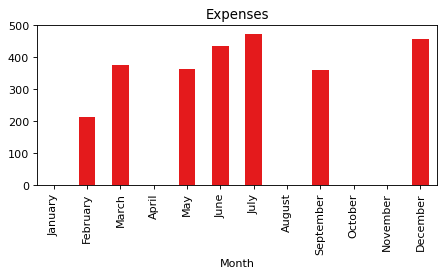

In [36]:
fig = plt.figure(figsize=(5,2),dpi=80)
axis = fig.add_axes([1,1,1,1])
df[(df['Year'] == 2019)].groupby('Month')['Expenses'].sum().plot.bar(cmap='Set1',ylim=(0,500),title='Expenses')

----- Corr BarPlot -----

<AxesSubplot:>

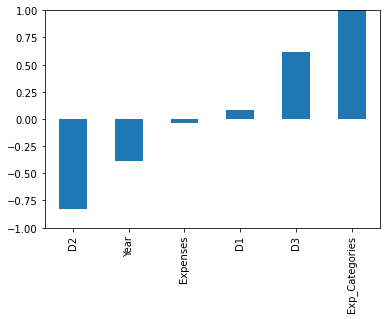

In [37]:
df.corr()['Exp_Categories'].sort_values().plot(kind='bar',ylim=(-1,1))

----- Line plot -----

<AxesSubplot:title={'center':'Expenses'}, xlabel='Month'>

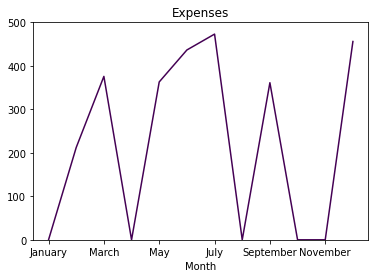

In [38]:
df[(df['Year'] == 2019)].groupby('Month')['Expenses'].sum().plot.line(cmap='viridis',ylim=(0,500),title='Expenses')

----- Scatter plot -----

In [39]:
# Looks like pandas scatter plot has a bug when trying to plot from datetime values. Thus, this will be done the following way:
df.drop('Month_number',inplace=True,axis=1)
month_map = {
'January':1,
'February':2,
'March':3,
'April':4,
'May':5,
'June':6,
'July':7,
'August':8,
'September':9,
'October':10,
'November':11,
'December':12    
}
df['Month_number'] = df['Month'].replace(month_map)

<AxesSubplot:xlabel='Month_number', ylabel='Expenses'>

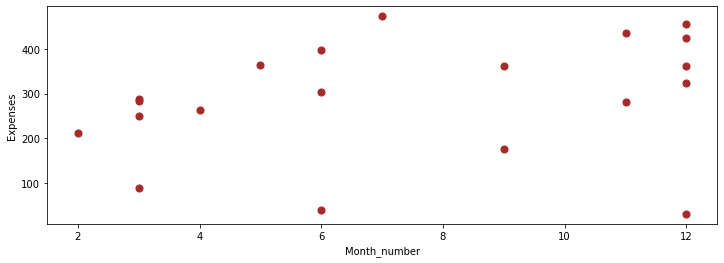

In [40]:
df.plot(kind='scatter',x='Month_number',y='Expenses',figsize=(12,4),color='brown',s=50)